

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#Refrences">Refrences</a></li>
</ul>

<a id='intro'></a>
## Introduction

> For my project I chose TMDB which contains movie data. I will first load my work and clean it up before taking a closer look at the data to complete the eight research questions I have come up with, to see how profitability, popularity, budgets and revenus influence the Movie industry.
>


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [ ]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.




### Data Cleaning (Replace this with more specific notes!)

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

%matplotlib inline

df_tmdb = pd.read_csv('tmdb_movies.csv')
df_tmdb.head()
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [3]:
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

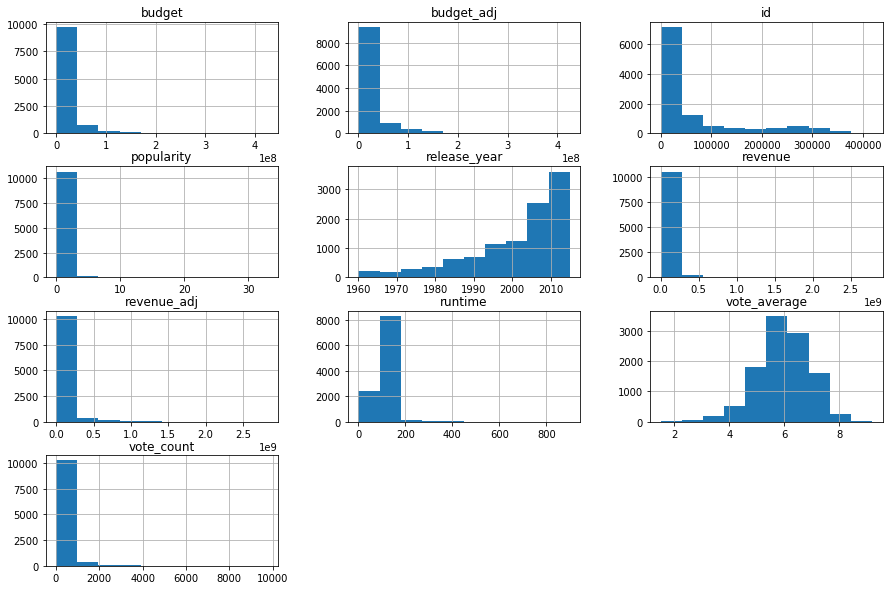

In [4]:
df_tmdb.hist(figsize=(15, 10));

In [5]:
print(df_tmdb.duplicated().sum())

1


In [7]:
#need to drop duplicate
df_tmdb.drop_duplicates(inplace=True)

In [9]:
#confirm duplicate has been done
df_tmdb.duplicated().sum()


0

In [11]:
df_tmdb.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,66066.374413,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07
std,92134.091971,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.000000,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20662.000000,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75612.000000,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [12]:
#find the number of null values
df_tmdb.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [15]:
#Before we fix null values I'm going to drop some columns that 
#I don't think will be used in my analysis for this datafile.

#let's drop home, tagline, overview, budget_adj, revenue_adj and runtime.
columns = ['homepage', 'tagline', 'overview', 'budget_adj', 'revenue_adj', 'runtime']
df_tmdb.drop(columns,  axis=1, inplace=True)



In [16]:
#Now to confirm columns have been dropped
df_tmdb.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015


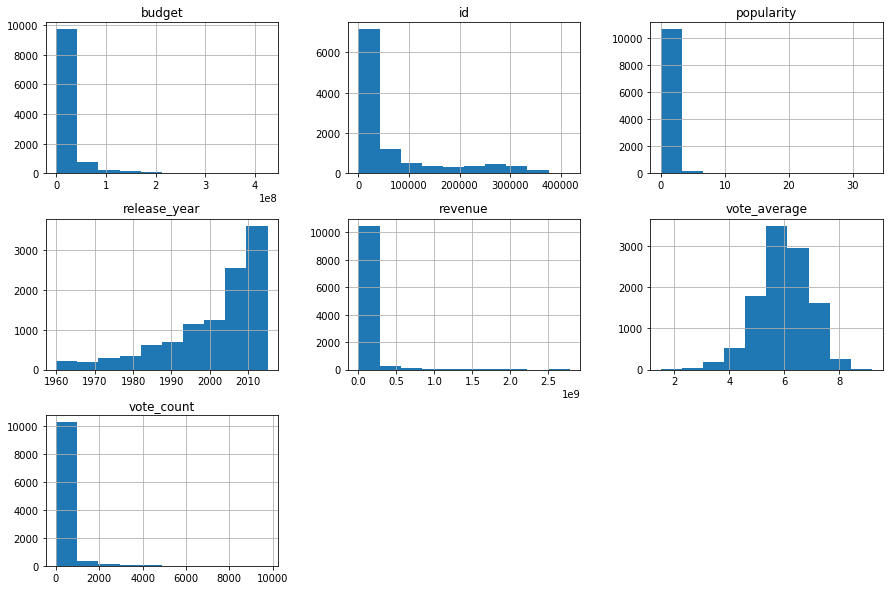

In [17]:
#Looks good! Now I'm going to get a new histagram of the columns for the updated table
df_tmdb.hist(figsize=(15, 10));

In [18]:
#checking for 0 values in budget
df_budget_zero = df_tmdb.query('budget == 0')
print(df_budget_zero)


           id    imdb_id  popularity  budget   revenue  \
30     280996  tt3168230    3.927333       0  29355203   
36     339527  tt1291570    3.358321       0  22354572   
72     284289  tt2911668    2.272044       0     45895   
74     347096  tt3478232    2.165433       0         0   
75     308369  tt2582496    2.141506       0         0   
...       ...        ...         ...     ...       ...   
10860    5060  tt0060214    0.087034       0         0   
10861      21  tt0060371    0.080598       0         0   
10862   20379  tt0060472    0.065543       0         0   
10863   39768  tt0060161    0.065141       0         0   
10864   21449  tt0061177    0.064317       0         0   

                       original_title  \
30                         Mr. Holmes   
36                             Solace   
72                   Beyond the Reach   
74             Mythica: The Darkspore   
75     Me and Earl and the Dying Girl   
...                               ...   
10860           

In [20]:
#since this produces a lot of data with a quick read out would be handy for gathering info on the zero counts in this column.
df_tmdb[(df_tmdb['budget']==0)].shape[0]


5696

In [22]:
#Much better and not so overwhleming let's now gather the data for revenue
df_tmdb[(df_tmdb['revenue']==0)].shape[0]

6016

In [ ]:
# The info producing is high for zero is high for budget and revenue. 
#I feel this is due to either lacking data or other circumstance as for 
#examples movies stopped production, never were released. 
#In this case its best to keep the data as is incase it influences any 
#of the future data we collect, and best not to delete.

In [26]:
#fill in missing values
df_tmdb.fillna(df_tmdb.mean(), inplace=True)
df_tmdb.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   imdb_id               10855 non-null  object 
 2   popularity            10865 non-null  float64
 3   budget                10865 non-null  int64  
 4   revenue               10865 non-null  int64  
 5   original_title        10865 non-null  object 
 6   cast                  10789 non-null  object 
 7   director              10821 non-null  object 
 8   keywords              9372 non-null   object 
 9   genres                10842 non-null  object 
 10  production_companies  9835 non-null   object 
 11  release_date          10865 non-null  object 
 12  vote_count            10865 non-null  int64  
 13  vote_average          10865 non-null  float64
 14  release_year          10865 non-null  int64  
dtypes: float64(2), int6

In [28]:
#Not bad I see some missing values in places where a string might be present
#let's see if this will help fill in gaps
df_tmdb.fillna(0, inplace=True)

In [29]:
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   imdb_id               10865 non-null  object 
 2   popularity            10865 non-null  float64
 3   budget                10865 non-null  int64  
 4   revenue               10865 non-null  int64  
 5   original_title        10865 non-null  object 
 6   cast                  10865 non-null  object 
 7   director              10865 non-null  object 
 8   keywords              10865 non-null  object 
 9   genres                10865 non-null  object 
 10  production_companies  10865 non-null  object 
 11  release_date          10865 non-null  object 
 12  vote_count            10865 non-null  int64  
 13  vote_average          10865 non-null  float64
 14  release_year          10865 non-null  int64  
dtypes: float64(2), int6

In [ ]:
#Perfect! Now that we have all data filled in lets start exploring this data
#with a series of questions.

In [ ]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


<a id='eda'></a>
## Exploratory Data Analysis

##### Research Question 1: Find the Min and Max Movie through finding its profit value.
##### Research Question 2:  What Movie is the highest and lowest for budget and revenue?
##### Research Question 3:  What are the top 15 Profitable movies and the top 15 least profitable movies?
##### Research Question 4:  What have the Genres ranked from 1960-2015?
##### Research Question 5:  Who is the most frequent Actor or Actress used in movies?
##### Research Question 6:  Let take a closer look at Movies being released each year and find a production value for each year from 1960-2015.
##### Research Question 7:  Let's now find the most common key word, and how keywords associate with popularity.
##### Research Question 8:  Which director has the most films, and how do they compare with popularity.



### Research Question 1: Find the Min and Max Movie through finding its profit value.

In [7]:
#Now lets calculate the profit by taking the revenue and subtracting it 
#from budget.
df_tmdb['Profit'] = df_tmdb['revenue'] - df_tmdb['budget']



In [8]:
#From here we can use the Profit with the find_minmax() function and this
#will come in handy as we do more analysis through out the project!

#Before we get results use the idxmin and idxmax functions to find the lowest
#and highest movie profit results.
def find_minmax(x):
    min_index = df_tmdb[x].idxmin()
    high_index = df_tmdb[x].idxmax()
    high = pd.DataFrame(df_tmdb.loc[high_index,:])
    low = pd.DataFrame(df_tmdb.loc[min_index,:])

    return pd.concat([high,low],axis = 1)


In [9]:
#Let display our Profit results using the find_minmax() function.
find_minmax('Profit')

,1386,2244
id,19995,46528
imdb_id,tt0499549,tt1032751
popularity,9.43277,0.25054
budget,237000000,425000000
revenue,2781505847,11087569
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
homepage,http://www.avatarmovie.com/,http://www.iamrogue.com/thewarriorsway
director,James Cameron,Sngmoo Lee
tagline,Enter the World of Pandora.,Assassin. Hero. Legend.


In [10]:
#To check this print out is correct before moving forward use the following min
#and max code.

#confirming Min
df_tmdb[df_tmdb['Profit'] == df_tmdb['Profit'].min()]


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,Profit
2244,46528,tt1032751,0.25054,425000000,11087569,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,http://www.iamrogue.com/thewarriorsway,Sngmoo Lee,Assassin. Hero. Legend.,...,100,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,12/2/2010,74,6.4,2010,425000000.0,11087569.0,-413912431


In [11]:
#confirming Max
df_tmdb[df_tmdb['Profit'] == df_tmdb['Profit'].max()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,Profit
1386,19995,tt0499549,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,http://www.avatarmovie.com/,James Cameron,Enter the World of Pandora.,...,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,12/10/2009,8458,7.1,2009,240886902.9,2.827124e+09,2544505847


In [12]:
#Awesome! This code works so we can continue to customize and use the 
#find_minmax function in later parts.

### Research Question 2:  What Movie is the highest and lowest for budget and revenue?

In [13]:
df_tmdb['budget'] = df_tmdb['budget'].replace(np.nan,0)
find_minmax('budget')

,2244,30
id,46528,280996
imdb_id,tt1032751,tt3168230
popularity,0.25054,3.92733
budget,425000000,0
revenue,11087569,29355203
original_title,The Warrior's Way,Mr. Holmes
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Ian McKellen|Milo Parker|Laura Linney|Hattie M...
homepage,http://www.iamrogue.com/thewarriorsway,http://www.mrholmesfilm.com/
director,Sngmoo Lee,Bill Condon
tagline,Assassin. Hero. Legend.,The man behind the myth


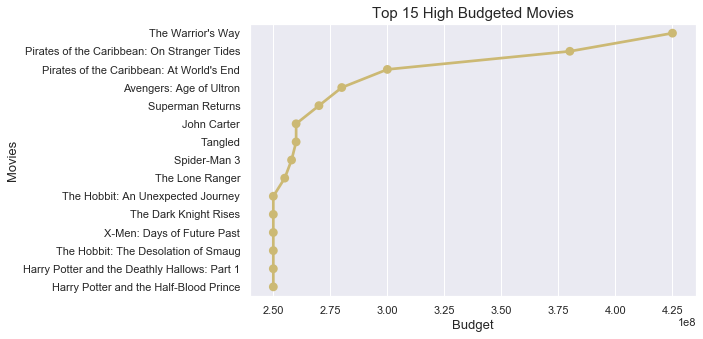

In [27]:
#top 15 movies which made highest revenue.
#Take the budget column storing it in a new dataframe and for the top movies
#make sure your ascending is False not True or it will be the last 10.
top_budg = pd.DataFrame(df_tmdb['budget'].sort_values(ascending = False))
top_budg['original_title'] = df_tmdb['original_title']
data = list(map(str,(top_budg['original_title'])))
x = list(data[:15])
y = list(top_budg['budget'][:15])

#make the point plot and setting up axis and labels.
ax = sns.pointplot(x=y,y=x, color="y",)
sns.set(rc={'figure.figsize':(18,5)})
ax.set_title("Top 15 High Budgeted Movies",fontsize = 15)
ax.set_ylabel("Movies",fontsize = 13)
ax.set_xlabel("Budget",fontsize = 13)
sns.set_style("darkgrid")

In [15]:
df_tmdb['revenue'] = df_tmdb['revenue'].replace(np.nan,0);
find_minmax('revenue')

,1386,48
id,19995,265208
imdb_id,tt0499549,tt2231253
popularity,9.43277,2.93234
budget,237000000,30000000
revenue,2781505847,0
original_title,Avatar,Wild Card
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Jason Statham|Michael Angarano|Milo Ventimigli...
homepage,http://www.avatarmovie.com/,NaN
director,James Cameron,Simon West
tagline,Enter the World of Pandora.,Never bet against a man with a killer hand.


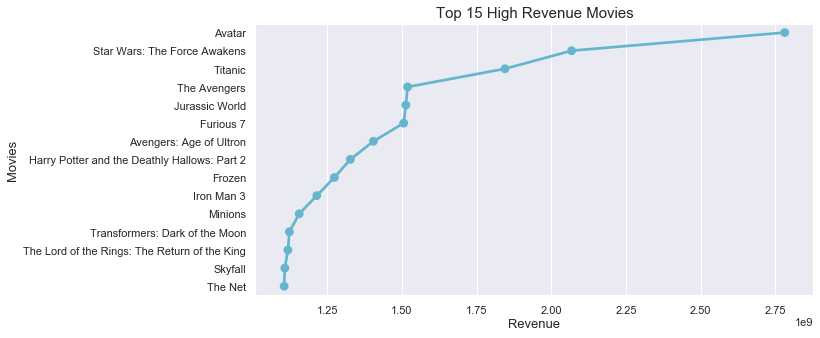

In [26]:
#top 15 movies which made highest revenue.
#sort the 'revenue' column in decending order and store it in the new dataframe.
top_rev = pd.DataFrame(df_tmdb['revenue'].sort_values(ascending = False))
top_rev['original_title'] = df_tmdb['original_title']
data = list(map(str,(top_rev['original_title'])))
x = list(data[:15])
y = list(top_rev['revenue'][:15])

#make the point plot and setting up axis and labels.
ax = sns.pointplot(x=y, y=x, color="c",)
sns.set(rc={'figure.figsize':(8,5)})
ax.set_title("Top 15 High Revenue Movies",fontsize = 15)
ax.set_ylabel("Movies",fontsize = 13)
ax.set_xlabel("Revenue",fontsize = 13)
sns.set_style("darkgrid")

### Research Question 3:  What are the top 15 Profitable movies and the top 15 least profitable movies?

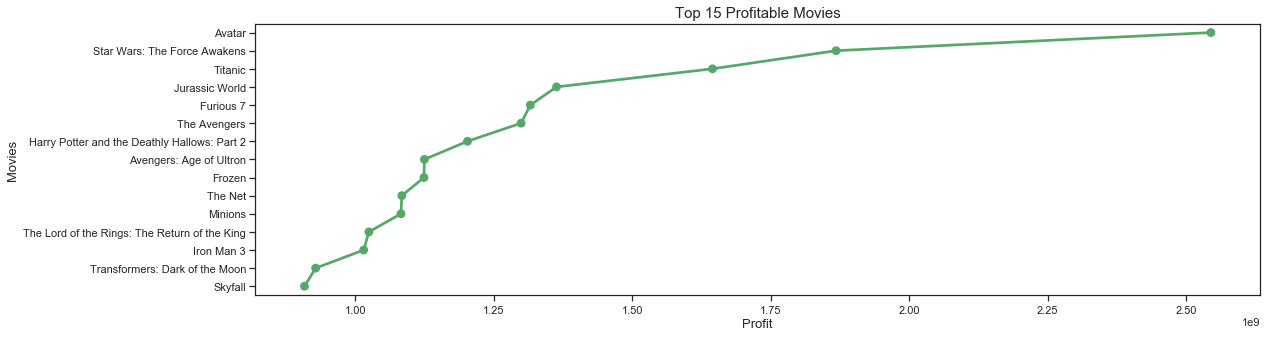

In [29]:
#Next find and plot a pointplot for the top 15 movies earning highest profit.
#Make sure to keep the ascending flase or it will plot the Least protfitable.
info = pd.DataFrame(df_tmdb['Profit'].sort_values(ascending = False))
info['original_title'] = df_tmdb['original_title']
data = list(map(str,(info['original_title'])))
x = list(data[:15])
y = list(info['Profit'][:15])
#make a plot using pointplot for top 15 profitable movies.
ax = sns.pointplot(x=y,y=x, color="g")
sns.set(rc={'figure.figsize':(8,5)})
ax.set_title("Top 15 Profitable Movies",fontsize = 15)
ax.set_ylabel("Movies",fontsize = 13)
ax.set_xlabel("Profit",fontsize = 13)
sns.set_style("ticks")



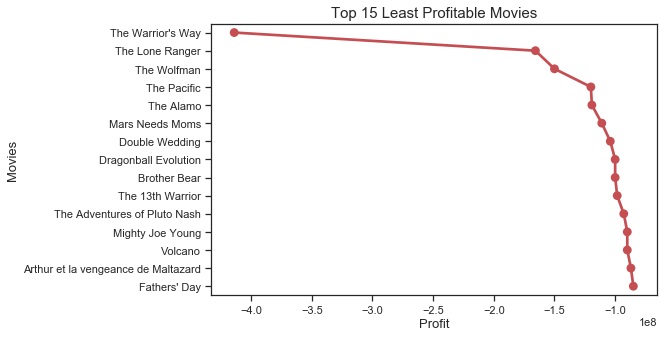

In [30]:
#Now lets get the least profitable movies using similar code only having to switch
#our acsending order to True.

info = pd.DataFrame(df_tmdb['Profit'].sort_values(ascending = True))
info['original_title'] = df_tmdb['original_title']
data = list(map(str,(info['original_title'])))
x = list(data[:15])
y = list(info['Profit'][:15])
#make a plot using pointplot for top Least 15 profitable movies.
ax = sns.pointplot(x=y,y=x, color="r")
sns.set(rc={'figure.figsize':(8,5)})
ax.set_title("Top 15 Least Profitable Movies",fontsize = 15)
ax.set_ylabel("Movies",fontsize = 13)
ax.set_xlabel("Profit",fontsize = 13)
sns.set_style("ticks")

### Research Question 4:  What have the Genres ranked from 1960-2015?

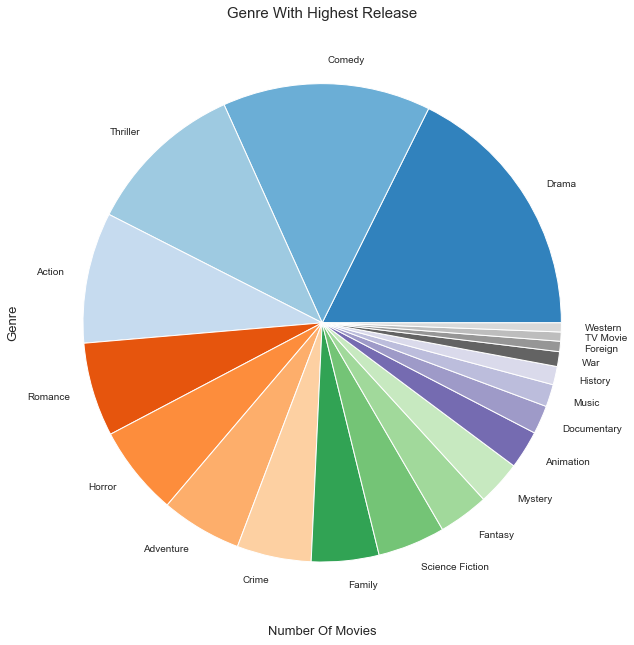

In [36]:
#Now lets see overall from 1960- 2015 how genres ranked over the decades us the 
#count_genre which will come in handy, but you first will use concatenation
# to seperate the |. Then using the 
def movie_info(x):
#concatenate 
    data_plot = df_tmdb[x].str.cat(sep = '|')
    data = pd.Series(data_plot.split('|'))
    info = data.value_counts(ascending=False)
    return info

#Now Count the Movies and can share on a pie chart
total_genre = movie_info('genres')
total_genre.plot(kind= 'pie',figsize = (18,11),fontsize=10,colormap='tab20c')

#Setup the title and axis labes!!
plt.title("Genre With Highest Release",fontsize=15)
plt.xlabel('Number Of Movies',fontsize=13)
plt.ylabel("Genre",fontsize= 13)
sns.set_style("dark")


In [53]:
print(total_genre)

Drama              4761
Comedy             3793
Thriller           2908
Action             2385
Romance            1712
Horror             1637
Adventure          1471
Crime              1355
Family             1231
Science Fiction    1230
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
dtype: int64


### Research Question 5:  Who is the most frequent Actor or Actress used in movies?

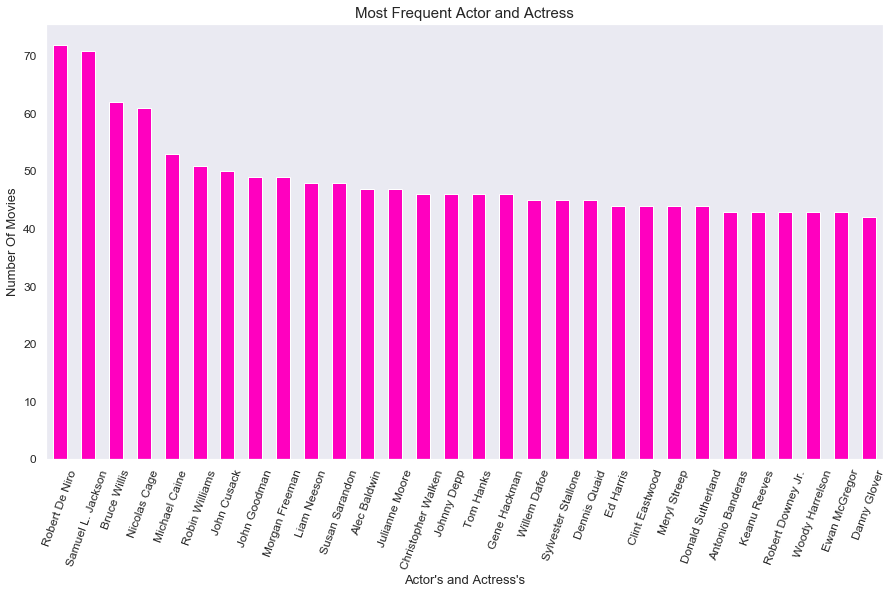

In [37]:
#using the similar function in finding the Highest Genre, now lets look into
#the most frequent Actor or Actress in movies.
count_actor = movie_info('cast')

#plot using the bar plot.
count_actor.iloc[:30].plot.bar(figsize=(15,8),colormap= 'gist_rainbow_r',fontsize=12)

#setup the title and the labels of the plot.
plt.title("Most Frequent Actor and Actress",fontsize=15)
plt.xticks(rotation = 70)
plt.xlabel("Actor's and Actress's",fontsize=13)
plt.ylabel("Number Of Movies",fontsize= 13)
sns.set_style("darkgrid")



In [82]:
print(count_actor.head(30))

Robert De Niro        72
Samuel L. Jackson     71
Bruce Willis          62
Nicolas Cage          61
Michael Caine         53
Robin Williams        51
John Cusack           50
Morgan Freeman        49
John Goodman          49
Susan Sarandon        48
Liam Neeson           48
Julianne Moore        47
Alec Baldwin          47
Johnny Depp           46
Tom Hanks             46
Christopher Walken    46
Gene Hackman          46
Dennis Quaid          45
Willem Dafoe          45
Sylvester Stallone    45
Clint Eastwood        44
Donald Sutherland     44
Ed Harris             44
Meryl Streep          44
Antonio Banderas      43
Robert Downey Jr.     43
Keanu Reeves          43
Woody Harrelson       43
Ewan McGregor         43
Nicole Kidman         42
dtype: int64


### Research Question 6:  Let take a closer look at Movies being released each year and find a production value for each year from 1960-2015.

In [83]:
df_tmdb['release_year'].value_counts()

2014    700
2013    659
2015    629
2012    588
2011    540
2009    533
2008    496
2010    490
2007    438
2006    408
2005    364
2004    307
2003    281
2002    266
2001    242
2000    227
1999    224
1998    210
1996    204
1997    192
1994    184
1993    178
1995    175
1988    145
1989    137
1992    133
1991    133
1990    132
1987    125
1986    121
1985    109
1984    105
1981     82
1982     81
1983     80
1980     78
1978     65
1979     57
1977     57
1971     55
1973     55
1974     47
1976     47
1966     46
1975     44
1964     42
1970     41
1967     40
1972     40
1968     39
1965     35
1963     34
1962     32
1960     32
1969     31
1961     31
Name: release_year, dtype: int64

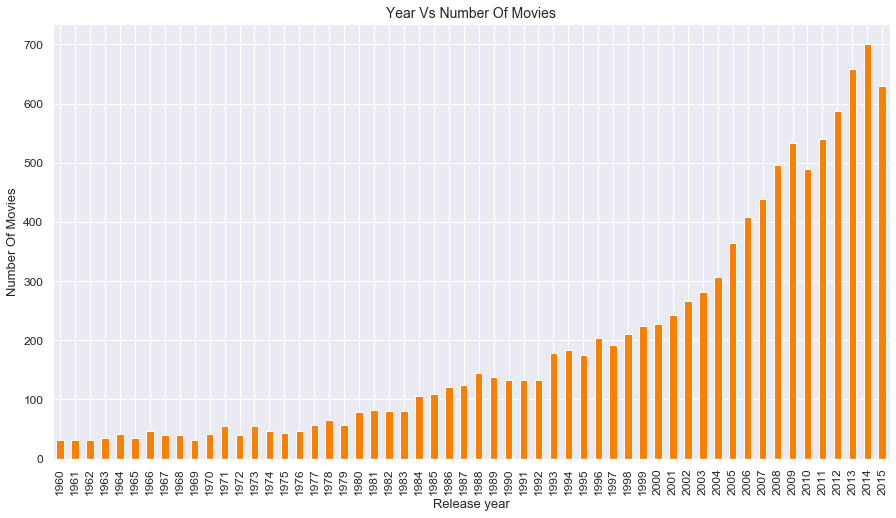

In [124]:
production = df_tmdb.groupby('release_year')['id']

df_tmdb.groupby('release_year').count()['id'].plot(kind='bar',figsize=(15,8),colormap= 'Wistia_r',fontsize=12)

sns.set(rc={'figure.figsize':(15,15)})
plt.title("Year Vs Number Of Movies",fontsize = 14)
plt.xlabel('Release year',fontsize = 13)
plt.ylabel('Number Of Movies',fontsize = 13);


In [126]:
print(production.count())

release_year
1960     32
1961     31
1962     32
1963     34
1964     42
1965     35
1966     46
1967     40
1968     39
1969     31
1970     41
1971     55
1972     40
1973     55
1974     47
1975     44
1976     47
1977     57
1978     65
1979     57
1980     78
1981     82
1982     81
1983     80
1984    105
1985    109
1986    121
1987    125
1988    145
1989    137
1990    132
1991    133
1992    133
1993    178
1994    184
1995    175
1996    204
1997    192
1998    210
1999    224
2000    227
2001    242
2002    266
2003    281
2004    307
2005    364
2006    408
2007    438
2008    496
2009    533
2010    490
2011    540
2012    588
2013    659
2014    700
2015    629
Name: id, dtype: int64


### Research Question 7:  Let's now find the most common key word, and how keywords associate with popularity.

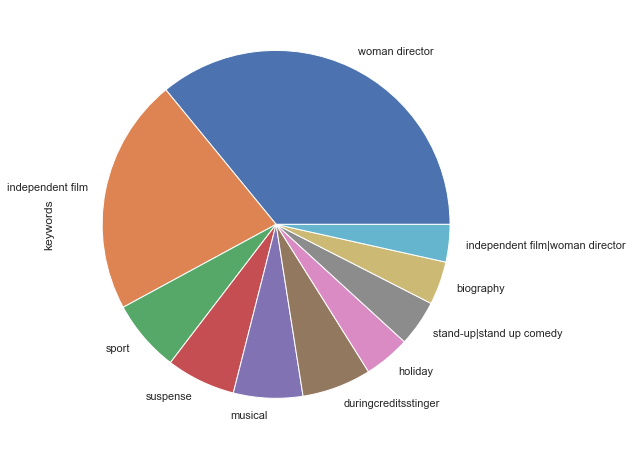

In [39]:
df_tmdb['keywords'].value_counts().head(10).plot(kind='pie', figsize=(15, 8));

In [159]:
df_tmdb['keywords'].value_counts().head(10)

woman director                     134
independent film                    82
sport                               25
duringcreditsstinger                24
suspense                            24
musical                             24
holiday                             16
stand-up|stand up comedy            16
biography                           15
independent film|woman director     13
Name: keywords, dtype: int64

In [161]:
#search the most popular movies to see their keywords, the way this presents
#you must use the tail() feature to go to the most popular and then their keyword.
df_tmdb['keywords'].groupby(df_tmdb['popularity']).value_counts().tail(10)

popularity  keywords                                                                           
10.739009   resistance|post-apocalyptic|dystopia|war|sequel                                        1
11.173104   android|spaceship|jedi|space opera|3d                                                  1
11.422751   hitman|revenge|murder|gangster|dog                                                     1
12.037933   android|galaxy|hermit|death star|lightsaber                                            1
12.971027   washington d.c.|future|shield|marvel comic|comic                                       1
13.112507   based on novel|revolution|dystopia|sequel|dystopic future                              1
14.311205   marvel comic|spaceship|space|scene during end credits|outer space                      1
24.949134   saving the world|artificial intelligence|father-son relationship|single parent|nasa    1
28.419936   future|chase|post-apocalyptic|dystopia|australia                                    

### Research Question 8:  Which director has the most films, and how do they compare with popularity.

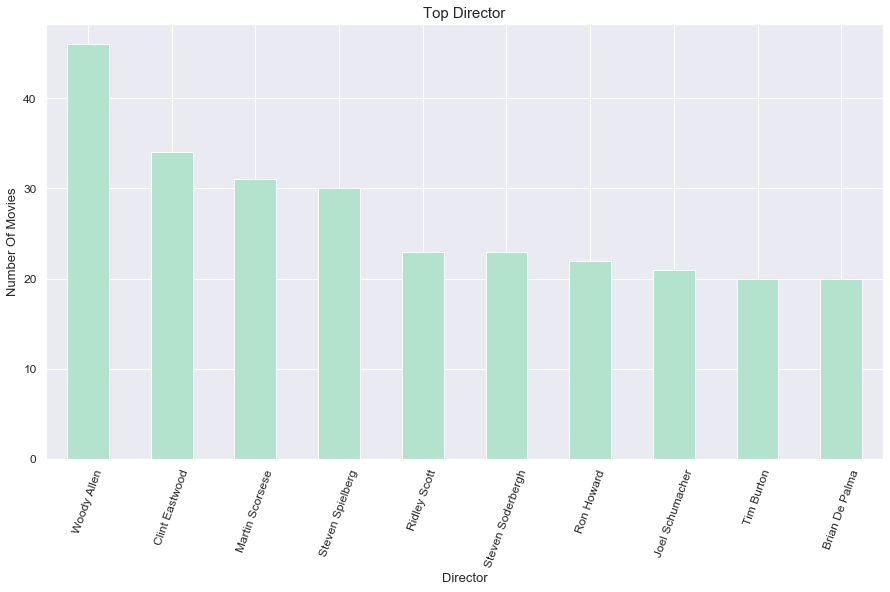

In [38]:
#find the director with the most number of directed movies.
count_director = movie_info('director')

#plot the bar plot.
count_director.iloc[:10].plot.bar(figsize=(15,8),colormap= 'Pastel2',fontsize=12)

#setup the title and the labels of the plot.
plt.title("Top Director",fontsize=15)
plt.xticks(rotation = 70)
plt.xlabel('Director',fontsize=13)
plt.ylabel("Number Of Movies",fontsize= 13)
sns.set_style("darkgrid")

In [22]:
#Similar to how I found the most popular movie and its keyword, we now will
#look at the director thats more popluar and not the number of films theyve made.
df_tmdb['director'].groupby(df_tmdb['popularity']).value_counts().tail(10)

popularity  director                   
10.739009   Francis Lawrence               1
11.173104   J.J. Abrams                    1
11.422751   Chad Stahelski|David Leitch    1
12.037933   George Lucas                   1
12.971027   Joe Russo|Anthony Russo        1
13.112507   Robert Schwentke               1
14.311205   James Gunn                     1
24.949134   Christopher Nolan              1
28.419936   George Miller                  1
32.985763   Colin Trevorrow                1
Name: director, dtype: int64

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!

Research Question 1: Find the Min and Max Movie through finding its profit value.

Conclusion:-By finding profit it was discovered the Avatar was the highest profiting movie and the warrior’s way yielded the least profit.

Research Question 2: What Movie is the highest and lowest for budget and revenue?

Conclusion:-	After finding the movie with the highest and lowest profit now its time to look at the movies in the budget and revenue columns to see the highest and lowest. It seems The Warriors Way had the highest budget and Mr.Holmes had the lowest at zero. This could have been one of our missing values we filled from missing data.  As for the Highest movie revenue goes to Avtar and with Wild Card being in last with Zero. Could this be another one of our missing data sets or did this movie not get released.
I’m curious what would happen if maybe we dropped the null values instead of filling them and see how much that fill might change the overall outcomes. for budget, revenue and profit.
    Exploring further into the movies with High budget and revenue I found the follow for the top 15.
Top 15 Budget
-	The Warrior’s Way
-	Pirates of the Caribbean: On Stranger Tides
-	Pirates of the Caribbean: At World’s End
-	Avenger: Age of Ultron
-	Superman Returns
-	John Carter
-	Tangled
-	Spider-Man 3
-	The Lone Ranger
-	The  Hobbit: An Unexpected Journey
-	The Dark Knight Rises
-	X-Men Days of Future Past
-	The Hobbit: The Desolation of Smaug
-	Harry Potter and the Deathly Hallows: Part 1
-	Harry Potter and the Half-Blood Prince
Tope 15 Revenue
-	Avatar
-	Star Wars: The force Awakens
-	Titanic
-	The Avengers
-	Jurassic World
-	Furious 7
-	Avengers: Age of Ultron
-	Harry Potter and the Deathly Hallows Part 2
-	Frozen
-	Iron Man 3
-	Minions
-	Transformers: Dark of the Moon
-	The Lord f the Rings: The Return of the King
-	Skyfall
-	The Net

I find both these list’s to be familiar and some personal favorites being included.  I find it amazing that for top Revenue there are two movies from the 90s that placed high. Taking a closure look it shows Avengers: Age of Ultron not only had a high budget but also a high revenue, very close with the Harry Potter Deathly Hallows movies. It seems Part 1 had a high budget, but Part 2 placed higher for revenue. Was the budget before the movie was released separately? That is another question that could have further research. 

Research Question 3: What are the top 15 Profitable movies and the top 15 least profitable movies?

Conclusion:Exploring further into the movies with Highest profit and revenue matched along with lowest profitable top15 movies, I found the follow for the top 15.
Top 15 Profitable Movies
-	Avatar
-	Star Wars: The force Awakens
-	Titanic
-	Jurassic World
-	Furious 7
-	The Avengers
-	Harry Potter and the Deathly Hallows: Part 2
-	Avengers: Age of Ultron
-	Frozen
-	The Net
-	Minions
-	The lord of the rings: the return of the king
-	Iron man 3
-	Transformers: Dark of the moon
-	Skyfall
Tope 15 Revenue
-	The Warrior’s Way
-	The Lone Ranger
-	The Wolfman
-	The Pacific
-	The Alamo
-	Mars needs moms
-	Double wedding
-	Dragonball Evolution
-	Brother Bear
-	The 13th Warrior
-	The Adventures of Pluto Nash
-	Mighty Joe Young
-	Volcano
-	Arthur et la vengeance de Maltazard
-	Father’s Day


Research Question 4: What have the Genres ranked from 1960-2015?

Conclusion: Amazingly from 1960-2015 the top genres for movies are starting at first place Drama, second Comedy, third Thriller, fourth Action, and fifth Romance. I was a little shocked to see Drama at number one and Action at number 4. It seems earlier movies to present have included more traces of drama through out the production of movies. Which goes to answer most individual just might prefer onscreen drama than real life!

Research Question 5: Who is the most frequent Actor or Actress used in movies?

Conclusion:The results for most frequent Actor and Actress surprised me. Having Robert De Niro and Sameuel L. Jackson as top two doesn’t fully surprise me but the remaining top 10 does. Among the top ten are great actors but only one actress which goes to Susan Sarandon. I expanded the list to view where are actresses might place and found Julianne Moore at twelfth, Meryl Streep at twenty-fourth place and Nicole Kidman at thirty.  It seems Marilyn Was right when she said it was a man’s world. I would love to see how an updated list might place these actors and actress in present 2020.

Research Question 6: Let take a closer look at Movies being released each year and find a production value for each year from 1960-2015.

Conclusion:The data I found with movies being released from 1960-2015 was shocking it goes from 31 movies being released in 1961 up to 700 in 2014! It seems Hollywood classics would be classics cause when they were released there was barley any competition making them easily fan favorites. However seeing 700 being released in 2014 I could only tell you the movies that grossed the most at the box office created more the impression. It does show for 2015 Movie makers only produced 629 movies. A slight decrease perhaps movie goers are finding it harder to keep up with movies and instead saving their times for the popular, higher budgeted movies to experience.

Research Question 7: Let's now find the most common key word, and how keywords associate with popularity.

Conclusion: Searching the keywords to movies I discovered woman director has the highest count, with independent film and sport in second and third. At the tenth place it is then independent film/ woman director. I think that’s fantastic to see woman director as the top keyword. I wanted to dig a little deeper so I choose which keywords went with the most popular and found monsters, dna, tyrannosaurus rex, velociraptor and island in the top most popular choice for movie. With the second popular choice including future, chase, post-apocalyptic, dystopia, Australia.  Reading these key words of the top 10 most popular brings each movie title quick to mind.

Research Question 8: Which director has the most films, and how do they compare with popularity.

Conclusion:Search for the director with the top movies made I found Woody Allen at number one with Clint Eastwood at second, martin Scorsese at third and Steven Spielberg at fourth. Switching gears and looking into the a director based on popularity I found Colin Trevorrow at number one, George Miller second, Christopher Nolan at third and James Gunn at fourth. That really is quite a different list to go by and provides to very valuable insights to the director that had directed the most vs a director that has more popularity based from their movie giving notion to quality vs quantity or vice versa?

# Reference

https://docs.python.org/2/library/string.html
https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot
https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
https://datatofish.com/replace-nan-values-with-zeros/
https://stackoverflow.com/questions/13411544/delete-column-from-pandas-dataframe
https://www.geeksforgeeks.org/python-pandas-series-idxmax/
https://stackoverflow.com/questions/10202570/find-row-where-values-for-column-is-maximal-in-a-pandas-dataframe